In [9]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# reading in scraped csv file

food = pd.read_csv(r'C:\Users\fouad\Documents\dataScienceAcademy\Week_5\foodOne_final.csv')
food1 = pd.read_csv(r'C:\Users\fouad\Documents\dataScienceAcademy\webScrapingProj\food_full1.csv')
#food1 has class corrected. I should go back and change instances of food with food1...
food1.head()

,nutri_perc_nutriName,all_comments,ingredients,pos_neg_comment,nutri_protein_num,nutri_sugar_num,nutri_carbs_perc,food_categories_text,food_subcategory_text,certified_organic,...,Vitamin E,Zinc,ingre_harmful_name,ingre_harmful_count,food_ewg_score,ingre_added_sugar,added_sugar_name,added_sugar_count,highly_processed_text,highly_processed_count
0,"[u'4', u'\nTotal Fat\n', u'5', u'\nTotal Carbs...","[u'\nThis product is not certified organic [',...","CULTURED LOWFAT MILK, NONFAT MILK, MODIFIED FO...","[u'Top findings negative', u'Top findings nega...",9,12,5.0,Baby Food,1% Fat Buttermilk,test,...,NaN,NaN,[],0.0,5.0,"[u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u' ...",[],0.0,[],0
1,"[u'4', u'\nTotal Fat\n', u'4', u'\nTotal Carbs...","[u'\nThis product is not certified organic [',...","CULTURED LOWFAT MILK, NONFAT MILK, MODIFIED FO...","[u'Top findings negative', u'Top findings nega...",8,12,4.0,Baby Food,1% Fat Buttermilk,test,...,NaN,NaN,[],0.0,5.0,"[u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u' ...",[],0.0,[],0
2,"[u'4', u'\nTotal Fat\n', u'4', u'\nTotal Carbs...","[u'\nThis product is not certified organic [',...","CULTURED LOWFAT MILK, NONFAT MILK, MODIFIED FO...","[u'Top findings negative', u'Top findings nega...",8,12,4.0,Baby Food,1% Fat Buttermilk,test,...,NaN,NaN,[],0.0,5.0,"[u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u' ...",[],0.0,[],0
3,"[u'5', u'\nTotal Fat\n', u'5', u'\nTotal Carbs...","[u'\nThis product is not certified organic [',...","CULTURED LOWFAT MILK, NONFAT MILK, SALT, VITAM...","[u'Top findings negative', u'Top findings nega...",10,14,5.0,Baby Food,1% Fat Buttermilk,test,...,NaN,NaN,[],0.0,5.0,"[u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u' ...",[],0.0,[],0
4,"[u'4', u'\nTotal Fat\n', u'4', u'\nTotal Carbs...","[u'\nThis product is not certified organic [',...","CULTURED LOWFAT MILK, SODIUM CITRATE, SALT, VI...","[u'Top findings negative', u'Top findings nega...",9,12,4.0,Baby Food,1% Fat Buttermilk,test,...,NaN,NaN,[],0.0,5.0,"[u'\n', u'\n', u'\n', u'\n', u'\n', u'\n', u' ...",[],0.0,[],0


In [2]:
# creating new columns from the nutrition label, based on whether something is a float or a string
data = food
data = map(lambda x: eval(x), data.iloc[:,0])
rows = map(lambda y: [x.encode('ascii','ignore').strip() for x in y], data)

total = []
for row in rows:
    item = {}
    i = 0
    while i < len(row):
        try: 
            v = float(row[i])
            k = row[i+1]
            item[k] = v
            i = i + 2
        except:
            k = row[i]
            item[k] = 0
        i = i + 1
    total.append(item)
    
totalX = pd.DataFrame(total)
totalX.ix[0].head()

                            NaN
Added Sugar Ingredients:    NaN
Calcium                     0.0
Cholesterol                 NaN
Copper                      NaN
Name: 0, dtype: float64

In [8]:
import pandas as pd

food['index_col'] = food.index
totalX['index_col'] = totalX.index

food_full = pd.merge(food, totalX, on = "index_col")
food_full

food_full['food_rating'].head()

0    https://phorcys-static.ewg.org/food/food_datab...
1    https://phorcys-static.ewg.org/food/food_datab...
2    https://phorcys-static.ewg.org/food/food_datab...
3    https://phorcys-static.ewg.org/food/food_datab...
4    https://phorcys-static.ewg.org/food/food_datab...
Name: food_rating, dtype: object

In [21]:
# extract the score from url scraped 

def score_func(s):
    a1 = re.findall('score_[0-9]+_[0-9]', s)
    a1_x = ''.join(a1)
    a2 = re.findall('[0-9]+_[0-9]', a1_x)
    a2_x = ''.join(a2)
    a2_x
    a2_dot = re.sub('_', '.', a2_x)
    a_score = pd.to_numeric(a2_dot)
    return a_score

food_full['food_ewg_score'] = food_full['food_rating'].map(score_func)

food_full['food_ewg_score'].head()

0    1.5
1    1.6
2    1.5
3    1.5
4    1.5
Name: food_ewg_score, dtype: float64

In [35]:
# functions to find all foods with harmful ingredients, added sugars, that are highly processed
# 0) converted nutri_addedSugars column from unicode to byte
# 1) found all harmful ingredients with str.findall (which outputs the strings that match)
# 2) counted all harmful ingredients, by row, with str.count

food_full['ingre_harmful_name'] = food_full['ingredients'].str.findall(r'(nitrite|nitrate|Potassium bromate|Propyl paraben|Butylated hydroxyanisole|BHA|Butylated hydroxytoluene|BHT|Propyl gallate|Theobromine|Secret flavor ingredients|Secret flavor|Secret|Artificial colors|Diacetyl|Phosphoric acid|Sodium polyphosphate|Pyrophosphate|Sodium tripolyphosphate|Polyphosphate|Tricalcium phosphate|Hexametaphosphate|Trisodium phosphate|Dicalcium phosphate|Sodium phosphate|Monocalcium phosphate|Tetrasodium phosphate|Aluminum phosphate|aluminum ammonium sulfate|aluminum calcium silicate|aluminum nicotinate|aluminum potassium sulfate|aluminum sodium sulfate|aluminum stearate|sodium aluminum phosphate|aluminum sulfate|sodium aluminum sulfate)',flags=re.IGNORECASE)
food_full['ingre_harmful_count'] = food_full['ingredients'].str.count(r'(nitrite|nitrate|Potassium bromate|Propyl paraben|Butylated hydroxyanisole|BHA|Butylated hydroxytoluene|BHT|Propyl gallate|Theobromine|Secret flavor ingredients|Secret flavor|Secret|Artificial colors|Diacetyl|Phosphoric acid|Sodium polyphosphate|Pyrophosphate|Sodium tripolyphosphate|Polyphosphate|Tricalcium phosphate|Hexametaphosphate|Trisodium phosphate|Dicalcium phosphate|Sodium phosphate|Monocalcium phosphate|Tetrasodium phosphate|Aluminum phosphate|aluminum ammonium sulfate|aluminum calcium silicate|aluminum nicotinate|aluminum potassium sulfate|aluminum sodium sulfate|aluminum stearate|sodium aluminum phosphate|aluminum sulfate|sodium aluminum sulfate)',flags=re.IGNORECASE)

food_full['ingre_added_sugar'] = food_full['nutri_addedSugars'].str.encode(encoding='utf-8', errors='strict')
food_full['added_sugar_name'] = food_full['nutri_addedSugars'].str.findall(r'(anhydrous dextrose|brown sugar|confectioner\'s powdered sugar|powdered sugar|corn syrup|corn syrup solids|dextrose|fructose|high+[\s]+fructose corn syrup|HFCS|honey|invert sugar|lactose|malt syrup|maltose|maple syrup|molasses|[\S]+[\s]+nectar|peach nectar|pear nectar|nectar|pancake syrup|raw sugar|sucrose|sugar|white granulated sugar|cane juice|evaporated corn sweetener|crystal dextrose|glucose|liquid fructose|sugar cane juice|fruit nectar)',flags=re.IGNORECASE)
food_full['added_sugar_count'] = food_full['nutri_addedSugars'].str.count(r'(anhydrous dextrose|brown sugar|confectioner\'s powdered sugar|powdered sugar|corn syrup|corn syrup solids|dextrose|fructose|high+[\s]+fructose corn syrup|HFCS|honey|invert sugar|lactose|malt syrup|maltose|maple syrup|molasses|[\S]+[\s]+nectar|peach nectar|pear nectar|nectar|pancake syrup|raw sugar|sucrose|sugar|white granulated sugar|cane juice|evaporated corn sweetener|crystal dextrose|glucose|liquid fructose|sugar cane juice|fruit nectar)',flags=re.IGNORECASE)

food_full['highly_processed_text'] = food_full['all_comments'].str.encode(encoding='utf-8', errors='strict')
food_full['highly_processed_text'] = food_full['all_comments'].str.findall(r'(Product has been classified as having high processing concerns)',flags=re.IGNORECASE)
food_full['highly_processed_count'] = food_full['all_comments'].str.count(r'(Product has been classified as having high processing concerns)',flags=re.IGNORECASE)

food1['num_ingredients'] = food1['ingredients'].str.count(r'(,)',flags=re.IGNORECASE)

In [8]:
#shows worst scoring subcategories
grp = food_full.groupby('food_category_text', sort=True)
score_by_subcateg = grp.food_ewg_score.agg('median').sort_values(ascending = False)
print score_by_subcateg

NameError: name 'food_full' is not defined

In [6]:
# #this shows the count in each category
# grp = food_full.groupby('food_category_text', sort=True)
# score_by_subcateg = grp.food_ewg_score.agg('count').sort_values(ascending = False)
# print score_by_subcateg

grp1 = food1.groupby('food_subcategory_text', sort=True)
score_by_subcateg1 = grp1.food_ewg_score.agg('median').sort_values(ascending = False)
print score_by_subcateg1

food_subcategory_text
Pepperoni                                           10.00
Non-dairy Creamers (Liquid)                         10.00
Pudding Mix                                         10.00
Cake Mixes                                          10.00
Other Cured Meats                                   10.00
Other Dessert Mixes                                 10.00
Frozen Pepperoni Pizza                              10.00
Powdered Instant Cocoa & Flavored or Malted Milk    10.00
Frozen Deluxe & Supreme Pizza                       10.00
Beef Sausages                                       10.00
Powdered Drinks                                     10.00
Powdered Creamers, Powdered Milk                    10.00
Edwards                                             10.00
Croissant Sandwiches                                10.00
Bologna                                             10.00
Pork Bacon                                          10.00
Bratwurst                                         

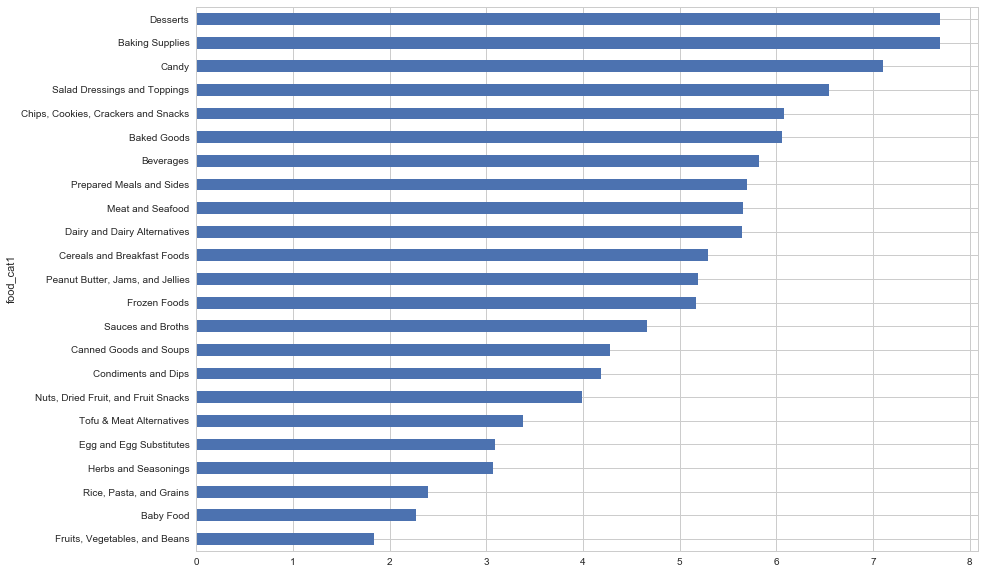

In [47]:
plt.figure(figsize=(14,10))
food1.groupby('food_cat1')['food_ewg_score'].mean().sort_values(ascending=True).plot.barh(sort_columns=True)
plt.show()

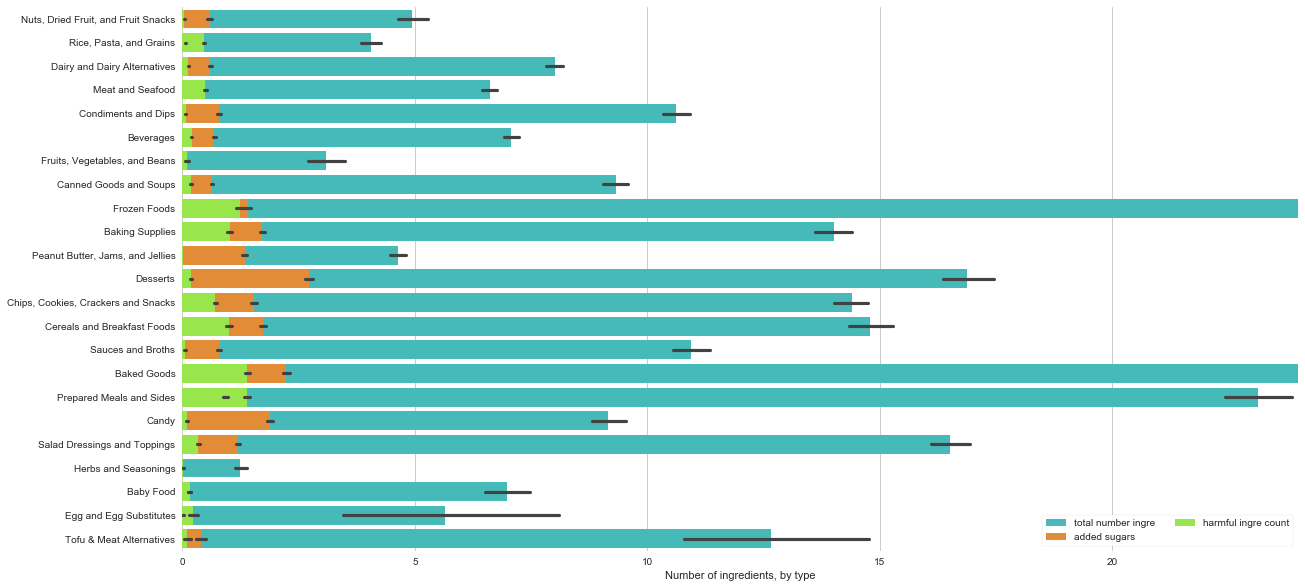

In [69]:
food1x = food1.loc[:, ['ingre_harmful_count', 'added_sugar_count', 'num_ingredients', 'food_cat1']]

sns.set(style="whitegrid")

# figure size
f, ax = plt.subplots(figsize=(20, 10))

num_ingre_sorted = food1x.sort_values(by="num_ingredients", ascending=True)

sns.set_color_codes("pastel")
sns.barplot(x="num_ingredients", y="food_cat1", data=num_ingre_sorted,
            label="total number ingre", color="#33cccc")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="added_sugar_count", y="food_cat1", data=num_ingre_sorted,
            label="added sugars", color="#ff8c1a")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="ingre_harmful_count", y="food_cat1", data=num_ingre_sorted,
            label="harmful ingre count", color="#99ff33")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Number of ingredients, by type")
sns.despine(left=True, bottom=True)

plt.savefig(r'C:\Users\fouad\Documents\dataScienceAcademy\webScrapingProj\stacked.png')
# how to save a seaborn image
sns.plt.show()

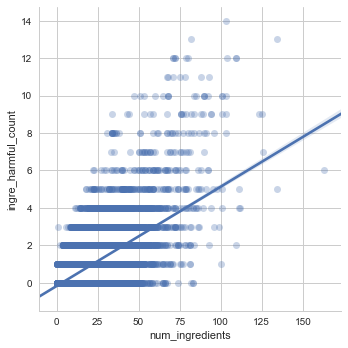

In [77]:
sns.lmplot("num_ingredients", "ingre_harmful_count", food1, scatter_kws={'alpha':0.3})
sns.plt.show()

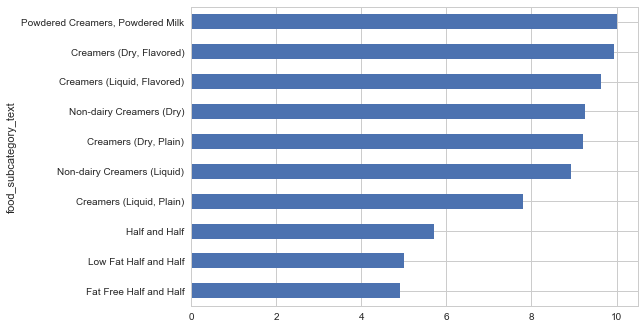

In [63]:
food2=food1.loc[food1.food_category_text=='Half and Half & Creamers',:]

food2.groupby('food_subcategory_text')['food_ewg_score'].mean().sort_values(ascending=True).plot.barh(sort_columns=True)
plt.show()

# for half and half plot, mention sugar is a common ingredient and may be the first
# for meat plot, mention the prescense of nitrates

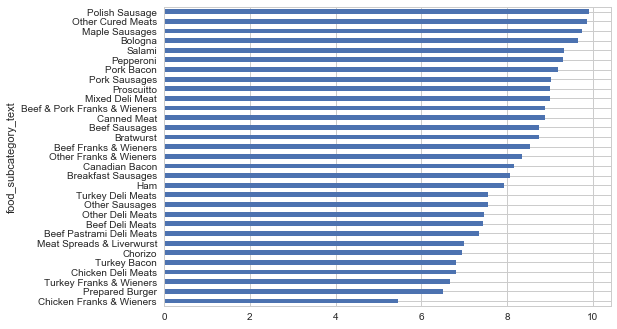

In [64]:
food3=food1.loc[food1.food_category_text=='Processed and Deli Meats',:]

food3.groupby('food_subcategory_text')['food_ewg_score'].mean().sort_values(ascending=True).plot.barh(sort_columns=True)
plt.show()

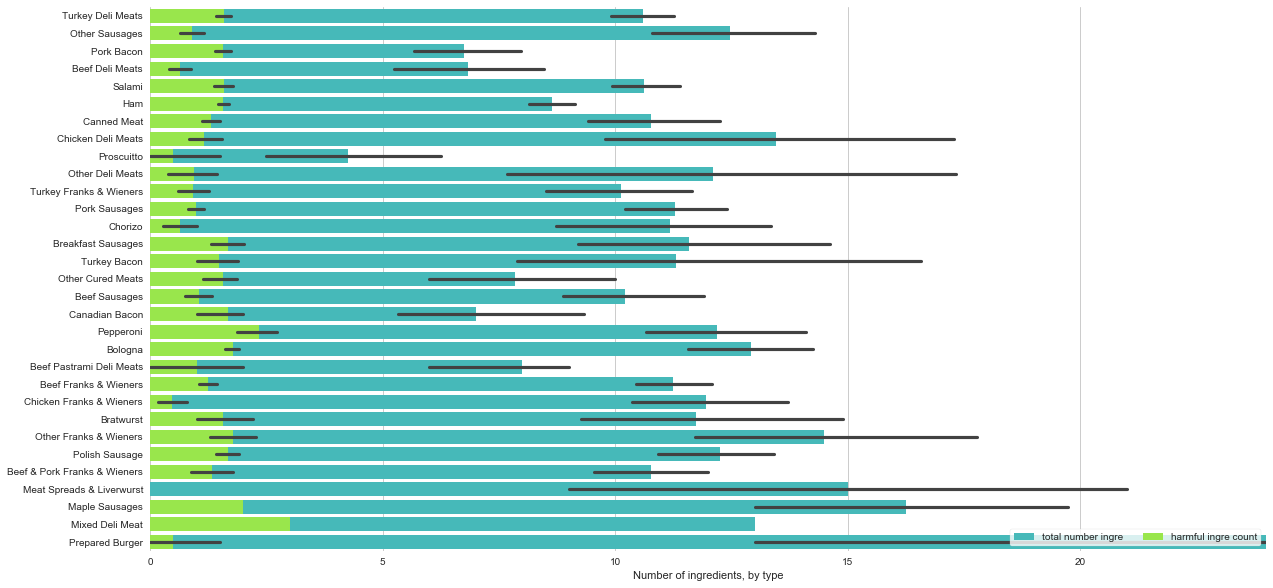

In [73]:
food3x = food3.loc[:, ['ingre_harmful_count', 'added_sugar_count', 'num_ingredients', 'food_subcategory_text']]

sns.set(style="whitegrid")

# figure size
f, ax = plt.subplots(figsize=(20, 10))

num_ingre_sorted = food3x.sort_values(by="num_ingredients", ascending=True)

sns.set_color_codes("pastel")
sns.barplot(x="num_ingredients", y="food_subcategory_text", data=num_ingre_sorted,
            label="total number ingre", color="#33cccc")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="ingre_harmful_count", y="food_subcategory_text", data=num_ingre_sorted,
            label="harmful ingre count", color="#99ff33")

# # Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(x="added_sugar_count", y="food_subcategory_text", data=num_ingre_sorted,
#             label="added sugars", color="#ff8c1a")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Number of ingredients, by type")
sns.despine(left=True, bottom=True)

plt.savefig(r'C:\Users\fouad\Documents\dataScienceAcademy\webScrapingProj\stacked_meat.png')
# how to save a seaborn image
sns.plt.show()

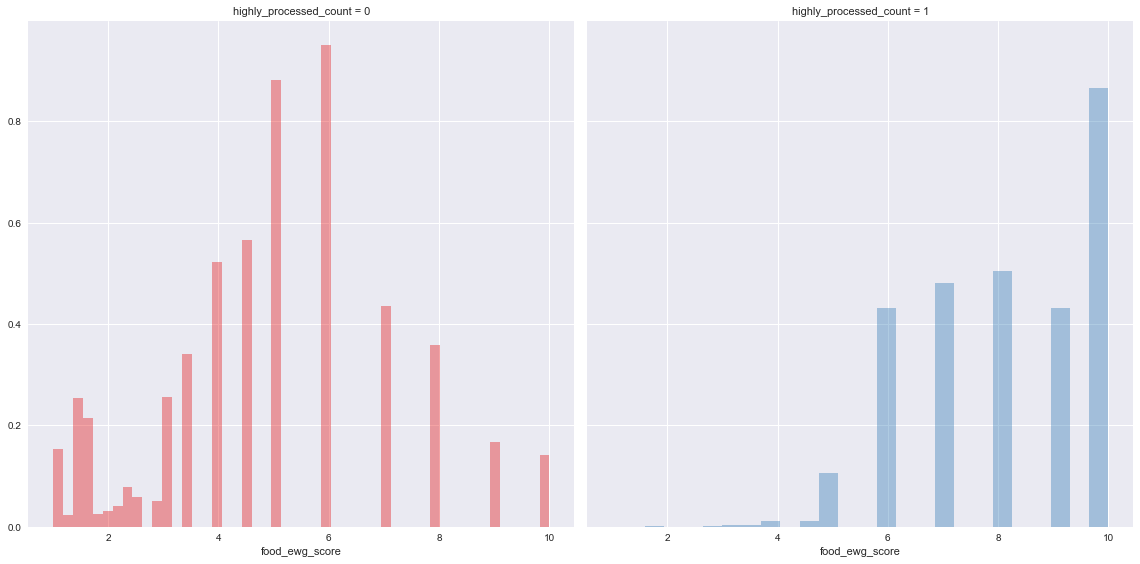

In [5]:
processedGrid = sns.FacetGrid(food1, col='highly_processed_count', hue="highly_processed_count", palette="Set1", size=8)
processedGrid.map(sns.distplot, "food_ewg_score", kde = False)
#if I wanted to show 
sns.plt.show()